[Titan Image Generator G1 - Request and response format](https://docs.aws.amazon.com/bedrock/latest/userguide/model-parameters-titan-image.html)

In [2]:
import os
import sys

ROOT_PATH = os.path.abspath("../../")
sys.path.append(ROOT_PATH)

In [3]:
import boto3
from common.utils.images import display_image, encode_image_base64_from_file
from common.aws.titan_image import ImageParams


def gen_image(body: str):
    bedrock = boto3.client(service_name='bedrock-runtime',
                           region_name = 'us-west-2')
    response = bedrock.invoke_model(
        body=body,
        modelId="amazon.titan-image-generator-v2:0",
        accept="application/json",
        contentType="application/json"
    )
    response_body = json.loads(response.get("body").read())
    image = response_body.get("images")
    return image


image_params = ImageParams()

## Text to Image


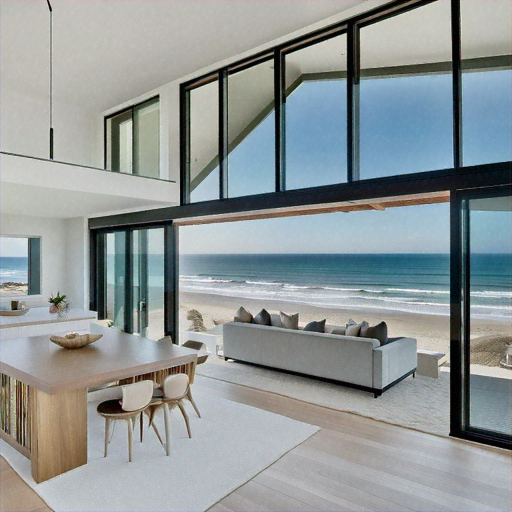

In [5]:
body = image_params.text_to_image(text="Modern, high-end beach house interior with panoramic views of the sand and sea, emphasizing sleek design and uncluttered spaces")
img = gen_image(body)
display_image(img)

## Image Variation

The Titan Image Generator can import existing images and create modified versions based on them. This is useful when you have an image with desired elements but want to generate several alternative options with similar characteristics.


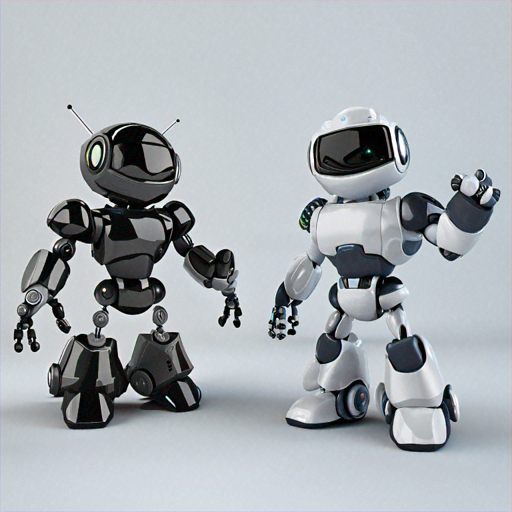


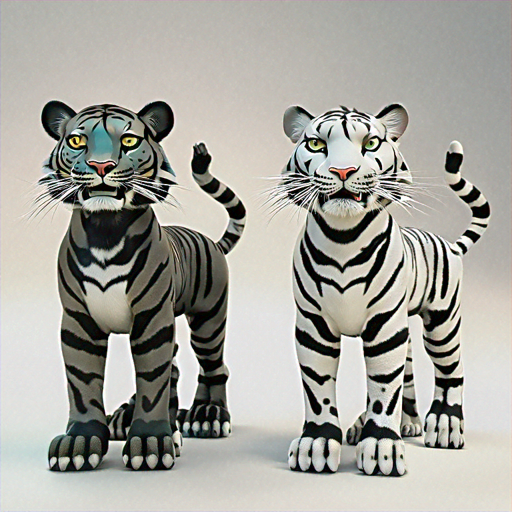

In [8]:
input = encode_image_base64_from_file(f"./sample/robots.png", format="PNG")
display_image(input)

body = image_params.image_variant(
    images=[input],
    text="tiger"
)
img = gen_image(body)
display_image(img)

## Inpainting

This is the process of repainting all pixels within the masked area of an image. When using an image mask, all black pixels are repainted. If using a mask prompt, the items indicated in the mask prompt are repainted.


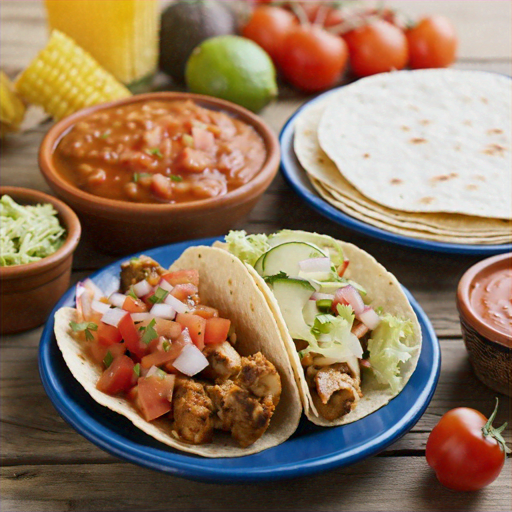


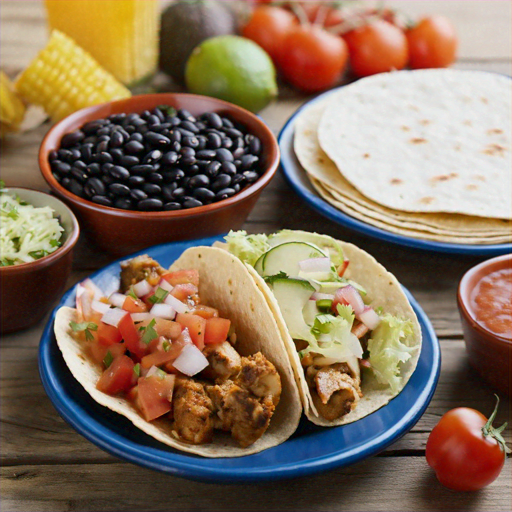

In [4]:
input = encode_image_base64_from_file(f"./sample/food.png", format="PNG")
display_image(input)

body = image_params.inpainting(image=input,
                                mask_prompt="bowl of salsa",
                                text="bowl of black beans")
img = gen_image(body)
display_image(img)

## Outpainting

This is a process of painting all pixels outside the mask area of the image. When using an image mask, all white pixels are repainted. If using a mask prompt, items shown in the mask prompt are preserved while everything else is repainted.


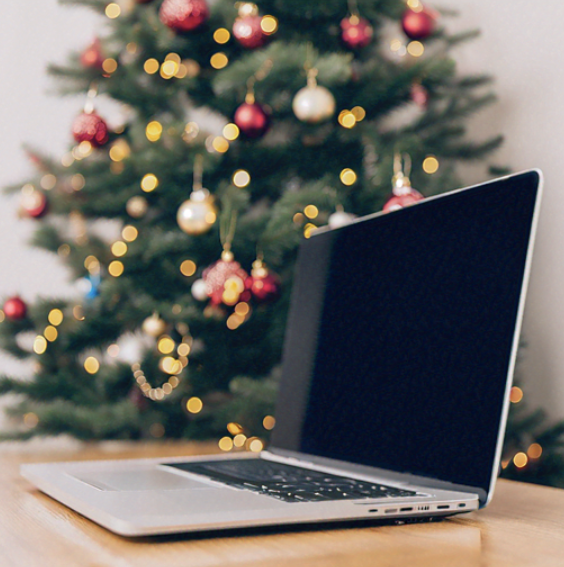


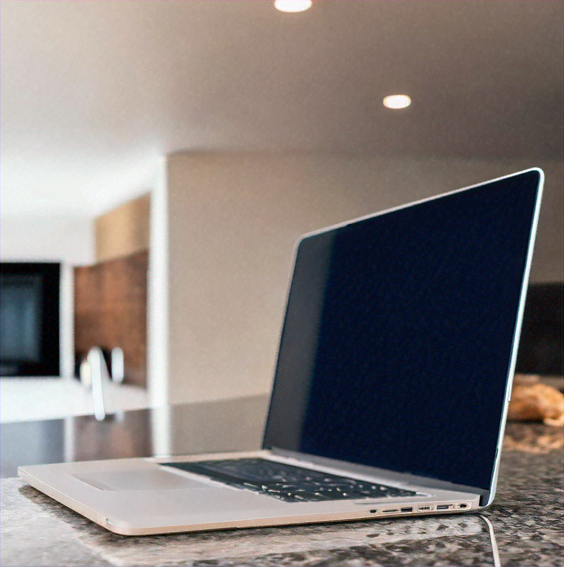

In [5]:
input = encode_image_base64_from_file(f"./sample/laptop.png", format="PNG")
display_image(input)

body = image_params.outpainting(image=input,
                                mask_prompt="laptop",
                                text="laptop on a granite countertop")
img = gen_image(body)
display_image(img)

## Image Conditioning

You can use image conditioning to intentionally and precisely shape your artwork. By providing a reference image (i.e., conditioning image), you can direct the model to focus on specific visual characteristics such as edges, object contours, structural elements, or segmentation maps that define individual areas and objects within the reference image.

AWS supports two types of image conditioning: Canny edge and segmentation.

- The Canny edge algorithm allows you to extract prominent edges from the reference image, creating a map that Amazon Titan Image Generator can use to guide the generation process. This enables you to 'draw' the foundation of your desired image. The model then fills in the details, textures, and ultimately the aesthetic elements according to your guidance.

- Segmentation offers a much more granular level of control. By providing a reference image, you can define specific areas or objects within the image and instruct Amazon Titan Image Generator to generate content that matches the defined regions. This allows for precise control over the placement and rendering of characters, objects, and other key elements.


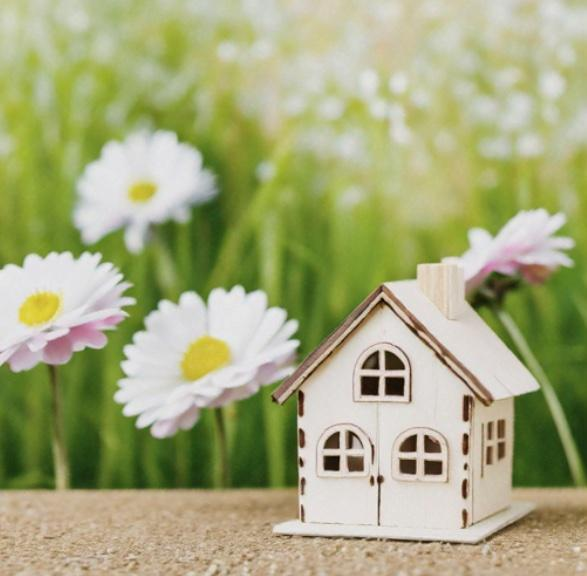


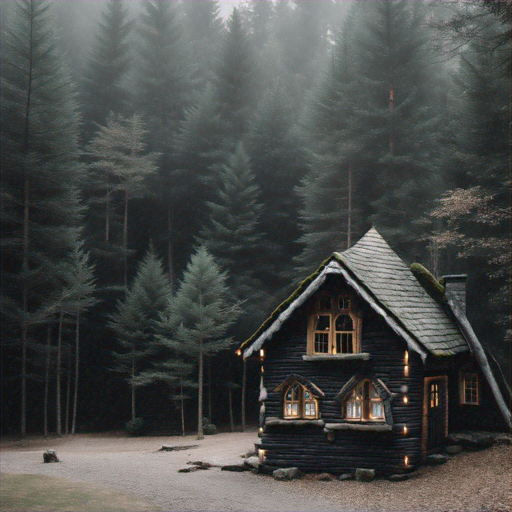

In [7]:
input_image = encode_image_base64_from_file(f"./sample/house.jpg", format="JPEG")
display_image(input_image)

body = image_params.text_to_image(text="A fairytale house in the forest", condition_image=input_image)
img = gen_image(body)
display_image(img)

## Color Conditioning

Most designers want to control the color palette of generated images as they aim to create images that adhere to color branding guidelines.

Using Amazon Titan Image Generator v2, you can generate color-conditioned images based on a color palette, which is a list of hexadecimal colors provided as part of the input that adheres to color branding guidelines. You can also provide a reference image as an optional input to generate images with the given hexadecimal colors while inheriting the style from the reference image.


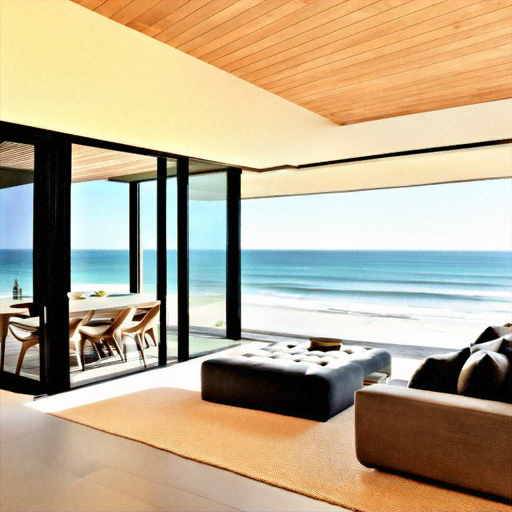

In [9]:
body = image_params.color_guide(
    text='Modern, high-end beach house interior with panoramic views of the sand and sea, emphasizing sleek design and uncluttered spaces',
    colors=['#ff8080', "#e5ff80"]
)
img = gen_image(body)
display_image(img)

## Background Removal

When compositing an image onto a solid background or layering it over another scene, the ability to remove the background cleanly and accurately is an essential tool in the creative workflow. You can instantly remove the background from an image in one go. Amazon Titan Image Generator v2 can intelligently detect and segment multiple foreground objects, allowing for clean separation of complex scenes with overlapping elements.


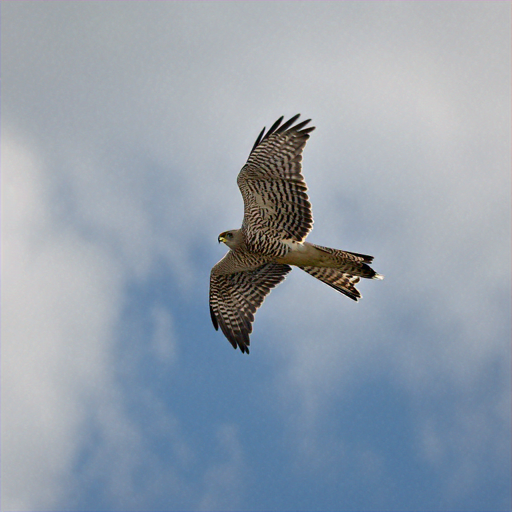


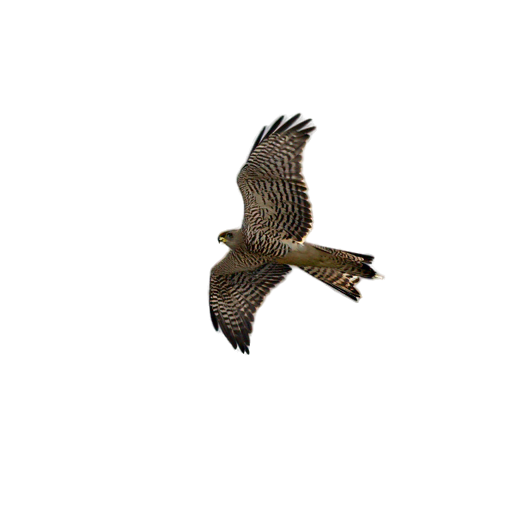

In [11]:
input = encode_image_base64_from_file(f"./sample/falcon.png", format="PNG")
display_image(input)

body = image_params.background_removal(image=input)
img = gen_image(body)
display_image(img)